# Логистическая регрессия (Logistic Regression)

---

**Источники:**


[Логистическая регрессия](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F)

[Логистическая регрессия (Logistic Regression)](https://wiki.loginom.ru/articles/logistic-regression.html)

[Multinomial Logistic Regression With Python](https://machinelearningmastery.com/multinomial-logistic-regression-with-python/)

[Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

[Multinomial logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression#:~:text=In%20statistics%2C%20multinomial%20logistic%20regression,than%20two%20possible%20discrete%20outcomes.)

[Вероятность](https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import sklearn

sklearn.__version__

'0.24.1'

In [8]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

## Загрузка данных

[Источник (CustomerChurnRate)](https://www.kaggle.com/gangliu/customerchurnrate).

In [9]:
df = pd.read_csv('./../../data/ChurnData.csv')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.00,33.00,7.00,136.00,5.00,5.00,0.00,1.00,1.00,4.40,20.75,0.00,15.25,35.70,42.00,211.45,125.00,1.00,1.00,0.00,1.00,1.00,0.00,1.48,3.03,4.91,4.00,1.00
1,33.00,33.00,12.00,33.00,2.00,0.00,0.00,0.00,0.00,9.45,0.00,0.00,0.00,0.00,288.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.25,3.24,3.50,1.00,1.00
2,23.00,30.00,9.00,30.00,1.00,2.00,0.00,0.00,0.00,6.30,0.00,0.00,0.00,0.00,157.05,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.84,3.24,3.40,3.00,0.00
3,38.00,35.00,5.00,76.00,2.00,10.00,1.00,1.00,1.00,6.05,45.00,50.10,23.25,64.90,239.55,1873.05,880.00,1.00,1.00,1.00,1.00,1.00,1.00,1.80,3.81,4.33,4.00,0.00
4,7.00,35.00,14.00,80.00,2.00,15.00,0.00,1.00,0.00,7.10,22.00,0.00,23.75,0.00,47.45,166.10,145.00,1.00,0.00,0.00,1.00,1.00,0.00,1.96,3.09,4.38,3.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.00,44.00,24.00,83.00,1.00,23.00,0.00,1.00,0.00,17.35,24.50,0.00,14.25,0.00,973.10,1343.50,720.00,0.00,0.00,0.00,0.00,1.00,0.00,2.85,3.20,4.42,3.00,0.00
196,34.00,23.00,3.00,24.00,1.00,7.00,0.00,1.00,0.00,6.00,28.00,0.00,12.75,0.00,203.25,959.40,435.00,0.00,0.00,0.00,1.00,1.00,0.00,1.79,3.33,3.18,3.00,0.00
197,6.00,32.00,10.00,47.00,1.00,10.00,0.00,1.00,0.00,3.85,23.75,0.00,12.50,0.00,29.90,128.45,80.00,0.00,0.00,0.00,1.00,1.00,0.00,1.35,3.17,3.85,3.00,0.00
198,24.00,30.00,0.00,25.00,4.00,5.00,0.00,1.00,1.00,8.70,47.75,0.00,32.75,64.00,186.60,1152.90,780.00,1.00,1.00,1.00,1.00,1.00,1.00,2.16,3.87,3.22,4.00,1.00


In [10]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',  'callcard', 'wireless','churn']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    float64
dtypes: float64(10)
memory usage: 15.8 KB


## Вероятность (Probability)

**Вероятность** — степень (относительная мера, количественная оценка) возможности наступления некоторого события.

В теории вероятностей и математической статистике понятие **вероятности** формализуется как числовая характеристика события — вероятностная мера (или её значение) — мера на множестве событий (подмножеств множества элементарных событий), принимающая значения **от 0 до 1**.

Если вероятность наступления события равна $p$, то вероятность его ненаступления (а также невероятность наступления) равна $1-p$.

В частности, вероятность $\large \frac{1}{2}$ означает равную вероятность наступления и ненаступления события.

Классическое определение вероятности основано на понятии **равновозможности исходов**.

События $A$ и $B$ называются **независимыми**, если вероятность наступления одного из них не зависит от того, наступило ли другое событие.

TODO

### Примеры (для независимых событий)

- Вероятности выпадения "орла" или "решки" при случайном подбрасывании монеты одинаковы и равны $\large \frac{1}{2}$.

- Вероятности выпадения любой грани игральной кости одинаковы и равны $\large \frac{1}{6}$.

### Энтропия

В математической статистике **энтропия** — мера неопределённости распределения вероятностей.

## Различия между Линейной (Linear) и Логистической (Logistic) регрессией (Regression)


<img src="images/linear_vs_logistic_regression_2.png" width="600">


В то время как **линейная регрессия** подходит для оценки **непрерывных значений** (например, оценок цены дома), это не лучший инструмент для прогнозирования класса, то есть **дискретных значений**.

Чтобы **оценить класс**, нужно какое-то руководство в том, какой класс будет наиболее вероятным для этого набора признаков. Для этого можно использовать **логистическую регрессию**.

**Логистическая регрессия** - это **разновидность линейной регрессии**, полезная, когда наблюдаемая зависимая переменная $y$ является категориальной. 

**Логистическая регрессия** соответствует специальной s-образной кривой, взяв линейную регрессию и преобразовав числовую оценку в вероятность с помощью следующей функции, которая называется сигмоидной функцией $\sigma$:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Или:
$$
Probability\space of \space Class_1 =  P(y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

В этом уравнении ${\theta^TX}$ - это результат регрессии (сумма переменных, взвешенных коэффициентами), `exp` - экспоненциальная функция, а $\sigma(\theta^TX)$ - сигмоида или [логистическая функция](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5), также называется логистической кривой. Это обычная S-образная форма (сигмовидная кривая).

<img src="images/linear_vs_logistic_regression_1.png" width="600">


Итак, вкратце, логистическая регрессия передает входные данные через логистическую / сигмоиду, но затем обрабатывает результат как вероятность:

<img src="images/log_regr_prob.png" width="400">

**Логистическая регрессия выдаёт ответ в виде вероятности бинарного события (1 или 0).**

Эта модель применяется для решения задач классификации — объект $x$ можно отнести к классу $y=1$, если предсказанная моделью вероятность $P\{y=1|x\}>0.5$, и к классу $y=0$ в противном случае.
А логистическая регрессия **лучшим образом подходит, когда выходная переменная принимает только два значения**.

Цель алгоритма **логистической регрессии** - найти наилучшие параметры $\theta$ для $$ℎ_\theta(𝑥) = \sigma({\theta^TX})$$ таким образом, чтобы наилучшим образом предсказать класс каждого случая.

**Для улучшения обобщающей способности получающейся модели, то есть уменьшения эффекта переобучения, на практике часто рассматривается логистическая регрессия с регуляризацией.**

<img src="images/2d_log_reg.png" width="400">

## Бинарная классификация (ровно 2 класса)

### Предварительная обработка (pre-processing) и выбор (selection) данных

In [11]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(df['churn'])

In [12]:
from sklearn import preprocessing

# нормализация
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Обучение модели (Train)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
model

LogisticRegression(C=0.01, solver='liblinear')

In [15]:
y_predicted = model.predict(X_test)
y_predicted

array([1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1.])

In [16]:
# получить вероятности
y_predicted_prob = model.predict_proba(X_test)
y_predicted_prob

array([[0.38656023, 0.61343977],
       [0.51056913, 0.48943087],
       [0.43135046, 0.56864954],
       [0.48275764, 0.51724236],
       [0.54045433, 0.45954567],
       [0.49576813, 0.50423187],
       [0.50389928, 0.49610072],
       [0.69266187, 0.30733813],
       [0.50256918, 0.49743082],
       [0.57789737, 0.42210263],
       [0.46480723, 0.53519277],
       [0.56587407, 0.43412593],
       [0.46377126, 0.53622874],
       [0.45807231, 0.54192769],
       [0.42299191, 0.57700809],
       [0.53817335, 0.46182665],
       [0.49330424, 0.50669576],
       [0.59856883, 0.40143117],
       [0.40705512, 0.59294488],
       [0.58494278, 0.41505722],
       [0.46349978, 0.53650022],
       [0.46119514, 0.53880486],
       [0.61367213, 0.38632787],
       [0.63002696, 0.36997304],
       [0.50640699, 0.49359301],
       [0.61719551, 0.38280449],
       [0.54608498, 0.45391502],
       [0.65966676, 0.34033324],
       [0.76485295, 0.23514705],
       [0.57565117, 0.42434883],
       [0.

### Оценка качества модели (Evaluation)

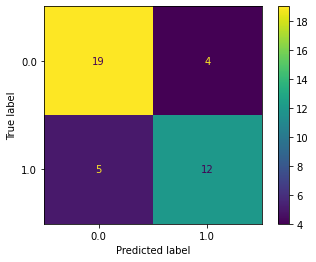

In [17]:
plot_confusion_matrix(model, X_test, y_test)

In [18]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81        23
         1.0       0.75      0.71      0.73        17

    accuracy                           0.78        40
   macro avg       0.77      0.77      0.77        40
weighted avg       0.77      0.78      0.77        40



In [19]:
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average='macro')
recall = recall_score(y_test, y_predicted, average='macro')
f1 = f1_score(y_test, y_predicted, average='macro')
roc_auc = roc_auc_score(y_test, y_predicted, average='macro')

print(f"accuracy = {accuracy:.3f}\nprecision = {precision:.3f}\nrecall = {recall:.3f}\nf1 = {f1:.3f}\nroc_auc = {roc_auc:.3f}")

accuracy = 0.775
precision = 0.771
recall = 0.766
f1 = 0.768
roc_auc = 0.766


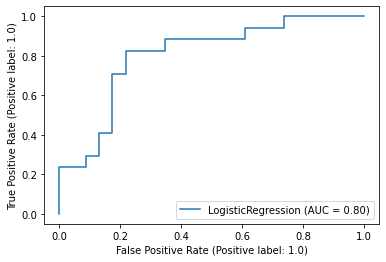

In [20]:
plot_roc_curve(model, X_test, y_test)

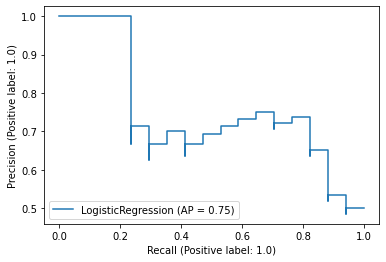

In [21]:
plot_precision_recall_curve(model, X_test, y_test)

## Мультиклассовая классификация (> 2 классов) / Multinomial logistic regression

Полиномиальная логистическая регрессия — это расширение логистической регрессии для мультиклассовой классификации.

По умолчанию логистическая регрессия не может использоваться для задач классификации, которые имеют более двух меток классов (мультиклассовая классификация).


В `sklearn` реализации в случае нескольких классов алгоритм обучения использует схему **one-vs-rest (OvR)**, если опция `multi_class `установлена на `ovr`, и использует потерю кросс-энтропии (cross-entropy loss), если опция `multi_class` установлена на `multinomial`. По умолчанию установлен вариант `auto`, в таком случае выбирается `ovr`, если данные являются двоичными, или если solver = `liblinear`, и в противном случае выбирает `multinomial`.

Если выбран вариант `ovr`, то для каждой метки подходит двоичная задача. Для `multinomial` функция потерь (loss) полином, соответствующие всему распределению вероятностей, даже если данные являются двоичными. Значение `multinomial` недоступно, если solver = `liblinear`.

### Предварительная обработка (pre-processing) и выбор (selection) данных

In [22]:
df.ed.value_counts()

4.00    59
2.00    48
1.00    40
3.00    36
5.00    17
Name: ed, dtype: int64

In [23]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'churn', 'employ', 'equip']])
y = np.asarray(df['ed'])

In [24]:
from sklearn import preprocessing

# нормализация
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.56469673,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061,  1.56469673,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -0.63910148,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.63910148,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.63910148,
         0.53441472, -0.85972695]])

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Обучение модели (Train)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
model

LogisticRegression(C=0.01, solver='liblinear')

In [27]:
y_predicted = model.predict(X_test)
y_predicted

array([4., 4., 4., 1., 4., 4., 4., 4., 1., 4., 4., 2., 2., 1., 4., 1., 4.,
       1., 2., 2., 4., 1., 4., 4., 4., 4., 1., 2., 4., 4., 4., 2., 4., 1.,
       4., 1., 4., 2., 2., 4.])

In [28]:
# получить вероятности
y_predicted_prob = model.predict_proba(X_test)
y_predicted_prob

array([[0.19238188, 0.21474231, 0.18668325, 0.22489745, 0.1812951 ],
       [0.17637588, 0.18943145, 0.18917411, 0.24625161, 0.19876695],
       [0.16223047, 0.19614997, 0.19077751, 0.25103579, 0.19980625],
       [0.24484203, 0.20396927, 0.19642956, 0.17816847, 0.17659068],
       [0.18561073, 0.21910102, 0.18585369, 0.23036061, 0.17907395],
       [0.1943609 , 0.19873807, 0.19797806, 0.21822225, 0.19070072],
       [0.15921836, 0.19599376, 0.18855556, 0.256359  , 0.19987332],
       [0.16638502, 0.20983136, 0.19816177, 0.23407673, 0.19154512],
       [0.23265957, 0.2121592 , 0.19797715, 0.18161795, 0.17558613],
       [0.1588543 , 0.19892816, 0.18811081, 0.25511547, 0.19899127],
       [0.1932545 , 0.19722021, 0.19967447, 0.22022906, 0.18962176],
       [0.21801811, 0.21861409, 0.19798181, 0.19317127, 0.17221472],
       [0.19578316, 0.22956689, 0.19745175, 0.2054439 , 0.1717543 ],
       [0.22079621, 0.17672889, 0.19843205, 0.20458935, 0.1994535 ],
       [0.18314966, 0.20306091, 0.

### Оценка качества модели (Evaluation)

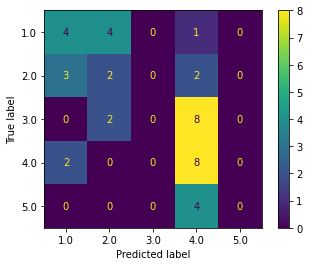

In [29]:
plot_confusion_matrix(model, X_test, y_test)

In [30]:
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average='micro')
recall = recall_score(y_test, y_predicted, average='micro')
f1 = f1_score(y_test, y_predicted, average='micro')

print(f"accuracy = {accuracy:.3f}\nprecision = {precision:.3f}\nrecall = {recall:.3f}\nf1 = {f1:.3f}")

accuracy = 0.350
precision = 0.350
recall = 0.350
f1 = 0.350
